# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


In [0]:
X = df['sqft_lot'].values[:, np.newaxis]
y = df['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

In [0]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_[0]
b_hat = model.intercept_

In [5]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape) 
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape) 
print("y_test_predicton:", y_test_predict)
print("Slope:", m_hat)
print("Intercept:", b_hat)
print('MSE:',MSE)
print('RMSE:',RMSE)
print('R^2:',R2)

X_train: (17290, 1)
X_test: (4323, 1)
Y_train: (17290,)
Y_test: (4323,)
y_test_predicton: [535482.19838401 535663.99126188 541220.22866882 ... 533228.27482202
 546670.16346073 538803.76994906]
Slope: 0.7703088045108236
Intercept: 529723.3697614912
MSE: 132030996771.23578
RMSE: 363360.69789017603
R^2: 0.01115570971436708


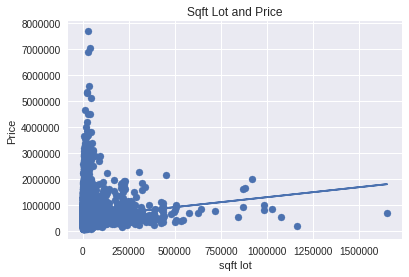

In [6]:
plt.scatter(df['sqft_lot'], df['price'])
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)
plt.ylabel("Price")
plt.xlabel("sqft lot")
plt.title("Sqft Lot and Price")
plt.show()


In [0]:
##### Your Code Here #####

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [8]:
X = df[['sqft_living','sqft_lot']]
y = df.loc[:, ['price']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_[0]
b_hat = model.intercept_


print("Slope:", m_hat)
print("Intercept:", b_hat)
print('Mean_Squared_Error:',MSE)
print('RMSE:',RMSE)
print('Root^2:',R2)

Slope: [ 2.83525566e+02 -2.82251694e-01]
Intercept: [-45557.57383448]
Mean_Squared_Error: 66543019048.62379
RMSE: 257959.33603694942
Root^2: 0.49057085768001907


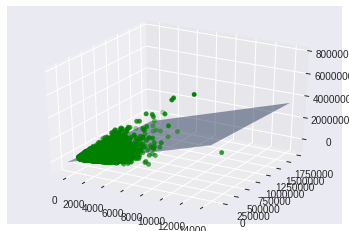

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sqft_living'], df['sqft_lot'], df['price'],c='green')

x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
beta_i=m_hat
beta_0=b_hat
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

plt3d = plt.gca(projection='3d')

plt3d.plot_surface(xx, yy, zz,alpha=0.5)

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [10]:
X = df.drop(['price','date'], axis=1)
y = df.loc[:, ['price']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_[0]
b_hat = model.intercept_


print("Slope:", m_hat)
print("Intercept:", b_hat)
print('MeanSquaredError:',MSE)
print('Root_Mean_Squared_Error:',RMSE)
print('R^2:',R2)

Slope: [-1.29521803e-06 -3.44072835e+04  3.96905966e+04  1.11907348e+02
  1.30766504e-01  1.01751037e+04  5.64626789e+05  5.54166913e+04
  2.55984846e+04  9.54777237e+04  7.10877606e+01  4.08195874e+01
 -2.68104915e+03  1.40115004e+01 -5.64797943e+02  5.97704718e+05
 -2.06164487e+05  2.09525140e+01 -4.09323416e-01]
Intercept: [6371680.15065889]
MeanSquaredError: 41029090379.499725
Root_Mean_Squared_Error: 202556.38814784322
R^2: 0.6888977903629089


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
